# Credit Risk Analytics

This project involves an in-depth analysis of a loan dataset from a consumer finance company. It aim to identify patterns and factors that indicate whether a loan applicant is likely to default on the loan, enabling the lending company to make informed lending decisions and minimize credit loss.

## 1. Data Understanding

In [180]:
#Importing pandas
import pandas as pd

In [181]:
# Reading the dataset into a DataFrame
original_df = pd.read_csv("loan.csv")

C:\Users\shahp\AppData\Local\Temp\ipykernel_7848\4158003575.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("loan.csv")


In [182]:
#Displaying first 5 rows of the dataframe
original_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [183]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [184]:
original_df.shape

(39717, 111)

In [185]:
print(f"Total number of columns: {original_df.shape[0]}")
print(f"Total number of rows: {original_df.shape[1]}")

Total number of columns: 39717
Total number of rows: 111


In [186]:
original_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Let's keep a backup of the original dataframe to original_df

In [187]:
# Creating a copy of the original DataFrame to df and we will be using df in further section of cleaning and analysing
df = original_df.copy()

Let's understand the dataframe by checking the header of the 

In [121]:
#Calculating the number of columns with all null values
num_columns_with_all_null = df.isnull().all().sum()
print(f"Number of columns with all null values: {num_columns_with_all_null}")

# Calculate the number of columns with at least one null values
num_columns_with_missing_values = df.columns[df.isnull().any()].nunique()
print(f"Number of columns with at least one null values: {num_columns_with_missing_values}")

Number of columns with all null values: 54
Number of columns with at least one null values: 68


In [122]:
# 68 columns have null values in it. But, deleting all those column might result to the loss of data.
# Lets delete the columns with more than 30% of the values null

In [123]:
# Define a threshold for the maximum allowable missing values
max_missing_threshold = 0.3

# Calculate the percentage of missing values in each column
columns_with_missing_values = df.isnull().mean()

# Drop columns with missing values exceeding the threshold
columns_to_drop = columns_with_missing_values[columns_with_missing_values > max_missing_threshold].index

# Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df.shape

(39717, 53)

In [124]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [125]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [126]:
# Still can see lots of columns with values zero that is also the non essential columns.
# Lets drop columns with all the values zero by keeping threshold 100%

In [129]:
# Define a threshold for the maximum allowable zero values
max_zero_threshold = 1  # This threshold is set to 1, meaning all zeros

# Calculate the sum of values equal to zero in each column
columns_with_zero_values = (df == 0).sum()

# Drop columns with zero values exceeding the threshold
columns_to_drop = columns_with_zero_values[columns_with_zero_values > max_zero_threshold].index


print(f"Number of columns with all values 0: {len(columns_to_drop)}")

Number of columns with all values 0: 22


In [130]:
#Dropping all those 22 columns with all values 0

In [131]:
df = df.drop(columns=columns_to_drop)

Total Columns remaining

In [132]:
df.shape[1]

31

In [133]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'policy_code',
 'application_type']

In [134]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,addr_state,earliest_cr_line,open_acc,revol_util,total_acc,initial_list_status,last_pymnt_d,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,36 months,10.65%,162.87,B,B2,NaN,...,AZ,Jan-85,3,83.70%,9,f,Jan-15,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,...,GA,Apr-99,3,9.40%,4,f,Apr-13,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,36 months,15.96%,84.33,C,C5,NaN,...,IL,Nov-01,2,98.50%,10,f,Jun-14,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,CA,Feb-96,10,21%,37,f,Jan-15,Apr-16,1,INDIVIDUAL
4,1075358,1311748,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,...,OR,Jan-96,15,53.90%,38,f,May-16,May-16,1,INDIVIDUAL
5,1075269,1311441,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,AZ,Nov-04,9,28.30%,12,f,Jan-15,Jan-16,1,INDIVIDUAL
6,1069639,1304742,7000,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,...,NC,Jul-05,7,85.60%,11,f,May-16,May-16,1,INDIVIDUAL
7,1072053,1288686,3000,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,...,CA,Jan-07,4,87.50%,4,f,Jan-15,Dec-14,1,INDIVIDUAL
8,1071795,1306957,5600,5600,60 months,21.28%,152.39,F,F2,NaN,...,CA,Apr-04,11,32.60%,13,f,Apr-12,Aug-12,1,INDIVIDUAL
9,1071570,1306721,5375,5375,60 months,12.69%,121.45,B,B5,Starbucks,...,TX,Sep-04,2,36.50%,3,f,Nov-12,Mar-13,1,INDIVIDUAL


In [135]:
# Now checking one by one and listing out the non essential collumns first then will be removing the data with null values later

In [136]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'policy_code',
 'application_type']

In [138]:
# id is not essential
# member_id is not usually essential. But, lets keep this unique id just in case in future if we want to use other columns which is not in current dataframe, then using id we can map the original_df to the df
# loan_amt, funded_amnt, term, int_rate, installment, 'grade', 'sub_grade' are essential columns
# emp_title, emp_length is not that essential
# home_ownership maybe essential
# anual_inc is essential for analysis
# verification_status maybe essential
# issue_d not essential

In [139]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [140]:
# loan_status is essential column but the rows with 'Current' is not essential Will do row part later

In [141]:
df['pymnt_plan'].unique()

array(['n'], dtype=object)

In [142]:
# pymnt_plan not essential since all value are 'n'
# url, desc not essential for analysis
# purpose maybe essential

In [143]:
df['title'].head(50)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
13                            citicard fund
14                               Other Loan
15                  Debt Consolidation Loan
16                                     Home
17                                  Holiday
18                                  Medical
19      lowerratemeanseasiertogetoutofdebt!
20                Freedom From Credit Cards
21                             Debt Cleanup
22                         Credi

In [144]:
# title consists of long string and will be difficult for analysis since purpose explains about title, tittle is also non essential
# zip_code, addr_state not essential for now, if it we think can be essential later can be added later
# earliest_cr_line not essential for now
# open_acc, revol_util, total_acc, initial_list_status,'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' can be essential, if not can be removed later

In [145]:
df['policy_code'].unique()

array([1], dtype=int64)

In [146]:
# policy_code is not essential since all the values are '1'

In [147]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [148]:
# application_type not essential since all the the values are 'INDIVIDUAL' so can be excluded

In [149]:
# Final list of columns that are non essential are:
# id, emp_title, emp_length, issue_d, pymnt_plan, url, desc, title, zip_code, addr_state, earliest_cr_line, policy_code, application_type

In [150]:
df_with_dropped_null_and_zero = df.copy() #Run only once

df = df_with_dropped_null_and_zero.copy #Run only if you need to go back to the last backup dataframe

In [151]:
# Deleting the columns that won't be used in further analysis
columns_to_delete = ['id', 'emp_title', 'emp_length', 'issue_d', 'pymnt_plan', 'url',
                      'title', 'zip_code', 'addr_state', 'earliest_cr_line',
                     'last_credit_pull_d', 'policy_code', 'application_type']

# Dropping the specified columns
df.drop(columns=columns_to_delete, inplace=True)

In [152]:
# Count the total number of null values in each column
null_value_counts = df.isnull().sum()

# Sum the null value counts to get the total number of null values
total_null_values = null_value_counts.sum()

print("Total number of null values:", total_null_values)

Total number of null values: 121


In [153]:
# Filter for columns with null values
columns_with_null_values = null_value_counts[null_value_counts > 0]

# Print the column names with null values
print("Columns with null values:")
print(columns_with_null_values.index.tolist())

Columns with null values:
['revol_util', 'last_pymnt_d']


In [154]:
# last_pymnt_d can be excluded but revol_util is one of the most important factor to do analysis

In [155]:
# Dropping column last_pymnt_d
df.drop("last_pymnt_d", axis=1, inplace=True)


In [156]:
# Count the total number of null values in each column
null_value_counts = df.isnull().sum()

# Sum the null value counts to get the total number of null values
total_null_values = null_value_counts.sum()

print("Total number of null values:", total_null_values)

Total number of null values: 50


In [157]:
# Filter for columns with null values
columns_with_null_values = null_value_counts[null_value_counts > 0]

# Print the column names with null values
print("Columns with null values:")
print(columns_with_null_values.index.tolist())

Columns with null values:
['revol_util']


In [158]:
# The only column left with null value is revol_util. But, revol_util is a percentage of credit balance usage
# Can't normalize all null values to zero nor mean.
# So lets drop all the rows of revol_util with null values

In [159]:
df.shape

(39717, 17)

In [160]:
df.dropna(subset=['revol_util'], inplace=True)

In [161]:
# Remove the '%' symbol and convert to float
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)

# Now, the column should contain numerical values
df['revol_util'].head()


0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [162]:
df_with_dropped_null_and_zero.shape[0] - df.shape[0]

50

In [163]:
# Count the total number of null values in each column
null_value_counts = df.isnull().sum()

# Sum the null value counts to get the total number of null values
total_null_values = null_value_counts.sum()

print("Total number of null values:", total_null_values)

Total number of null values: 0


In [164]:
#Finally we were successfully able to drop all the null values

In [165]:
df.describe()

,member_id,loan_amnt,funded_amnt,installment,annual_inc,open_acc,revol_util,total_acc
count,3.966700e+04,39667.000000,39667.000000,39667.000000,3.966700e+04,39667.000000,39667.000000,39667.000000
mean,8.507335e+05,11227.664053,10955.590919,324.770793,6.899952e+04,9.300250,48.832152,22.103411
std,2.655990e+05,7456.610740,7187.135178,208.882852,6.378947e+04,4.398866,28.332634,11.398386
min,7.069900e+04,500.000000,500.000000,15.690000,4.000000e+03,2.000000,0.000000,2.000000
25%,6.669950e+05,5500.000000,5400.000000,167.080000,4.051632e+04,6.000000,25.400000,14.000000
50%,8.512230e+05,10000.000000,9625.000000,280.610000,5.900000e+04,9.000000,49.300000,20.000000
75%,1.047526e+06,15000.000000,15000.000000,430.780000,8.240000e+04,12.000000,72.400000,29.000000
max,1.314167e+06,35000.000000,35000.000000,1305.190000,6.000000e+06,44.000000,99.900000,90.000000


#### Cleaning Row

In [166]:
df.columns.tolist()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status']

In [167]:
df.shape

(39667, 17)

In [168]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [169]:
# We don't need 'Current' because they are neither defaulter nor fully paid customer and they won't be used for our analysis

In [170]:
# Keeping only 'Fully Paid' and 'Charged Off' loan_status
df = df[df['loan_status'] != 'Current']

In [ ]:
df.shape

(38527, 17)

In [ ]:
data_types = df.dtypes
print(data_types)

member_id                int64
loan_amnt                int64
funded_amnt              int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
open_acc                 int64
revol_util             float64
total_acc                int64
initial_list_status     object
dtype: object


In [ ]:
df['term'] = df['term'].astype('category')

In [ ]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

In [ ]:
df['grade'] = df['grade'].astype('category')
df['sub_grade'] = df['sub_grade'].astype('category')

In [ ]:
df['home_ownership'] = df['home_ownership'].astype('category')
df['verification_status'] = df['verification_status'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')
df['purpose'] = df['purpose'].astype('category')
df['initial_list_status'] = df['initial_list_status'].astype('category')


In [ ]:
data_types = df.dtypes
print(data_types)

member_id                 int64
loan_amnt                 int64
funded_amnt               int64
term                   category
int_rate                float64
installment             float64
grade                  category
sub_grade              category
home_ownership         category
annual_inc              float64
verification_status    category
loan_status            category
purpose                category
open_acc                  int64
revol_util              float64
total_acc                 int64
initial_list_status    category
dtype: object


In [ ]:
df.columns.tolist()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status']

In [ ]:
import numpy as np

In [ ]:
from scipy import stats

# Define a list of columns to check for outliers
columns_to_check = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'open_acc', 'revol_util', 'total_acc']

# Initialize an empty DataFrame to store Z-scores
z_scores = pd.DataFrame()

# Calculate Z-scores for each column
for col in columns_to_check:
    z_scores[col] = np.abs(stats.zscore(df[col]))

# Set a threshold for Z-scores (e.g., 3 for significant outliers)
threshold = 3

# Identify rows with Z-scores beyond the threshold
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]

# Print the rows with potential outliers
print(outlier_rows)


       loan_amnt  funded_amnt  installment  annual_inc  open_acc  revol_util  \
80      3.747499     1.914175     1.419809    1.336711  0.406829    0.170966   
209     2.909496     3.104332     2.748140    0.261512  0.635440    1.458756   
219     0.243124     0.299249     0.565934    0.261512  1.092663    0.093345   
250     0.975789     0.983075     0.873511    0.213368  4.750443    0.912189   
268     3.747499     2.675555     2.205022    0.293607  1.549885    0.160381   
...          ...          ...          ...         ...       ...         ...   
39579   0.768780     0.852251     1.155580    0.855279  4.064610    0.139515   
39588   1.128153     1.143366     1.153645    0.460637  3.150164    1.695144   
39611   2.223857     0.718596     0.604867    6.632470  0.050394    0.421467   
39633   0.023513     0.018740     0.289876    0.084986  4.293221    1.480228   
39671   0.442515     0.422058     0.372224    1.336711  1.321274    0.848682   

       total_acc  
80      0.807565  
2

In [ ]:
# Now lets go through all the columns
# loan_amnt and funded_amnt cant have outliers coz there can be people who can take very less loan and there can be people who can take much more loan
#

In [ ]:
Q1 = df['installment'].quantile(0.25)
Q3 = df['installment'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
threshold_multiplier = 1.5
lower_threshold = Q1 - threshold_multiplier * IQR
upper_threshold = Q3 + threshold_multiplier * IQR


In [ ]:
df = df[(df['installment'] >= lower_threshold) & (df['installment'] <= upper_threshold)]


In [ ]:
df.shape

(37181, 17)

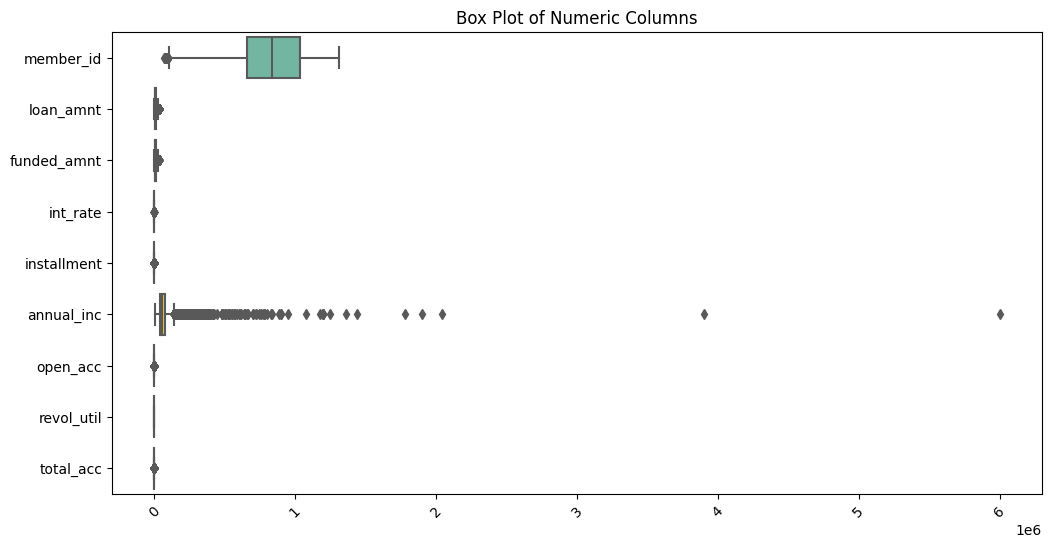

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numeric column
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
sns.boxplot(data=numeric_columns, orient="h", palette="Set2")
plt.title("Box Plot of Numeric Columns")

# Show the plot
plt.show()


In [ ]:
# Calculate the IQR for annual_inc
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold
threshold = 1.5 * IQR

# Identify outliers
outliers = df[(df['annual_inc'] < Q1 - threshold) | (df['annual_inc'] > Q3 + threshold)]

# Remove outliers
df_clean = df[~df.index.isin(outliers.index)]

# Check the shape of the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)


Original DataFrame shape: (37181, 17)
Cleaned DataFrame shape: (35585, 17)


In [ ]:
df = df_clean.copy()

In [ ]:
df.shape

(35585, 17)

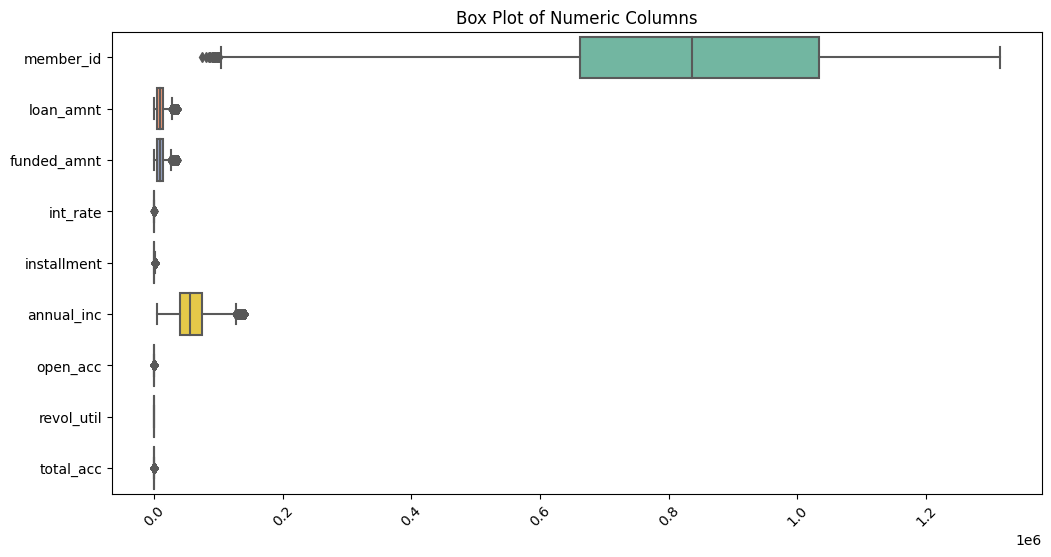

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numeric column
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
sns.boxplot(data=numeric_columns, orient="h", palette="Set2")
plt.title("Box Plot of Numeric Columns")

# Show the plot
plt.show()


In [ ]:
#Exploratory Data Analysis (EDA): Explore the cleaned dataset to gain insights and understand the data better.
# Summary statistics
summary_stats = df.describe()

# Value counts for categorical columns
categorical_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status']
value_counts = {col: df[col].value_counts() for col in categorical_columns}

# Correlation matrix (if applicable for numeric columns)
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-268-a01996ec46d4>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,open_acc,revol_util,total_acc
member_id,1.000000,0.102504,0.114220,0.042399,0.051631,0.028532,0.012419,0.089666,0.037002
loan_amnt,0.102504,1.000000,0.977649,0.259369,0.920927,0.364368,0.160256,0.056932,0.226915
funded_amnt,0.114220,0.977649,1.000000,0.264638,0.951736,0.359081,0.158450,0.061338,0.221434
int_rate,0.042399,0.259369,0.264638,1.000000,0.235726,0.028216,-0.017653,0.469055,-0.077851
installment,0.051631,0.920927,0.951736,0.235726,1.000000,0.357523,0.156154,0.091709,0.198475
annual_inc,0.028532,0.364368,0.359081,0.028216,0.357523,1.000000,0.260739,0.038622,0.380573
open_acc,0.012419,0.160256,0.158450,-0.017653,0.156154,0.260739,1.000000,-0.101742,0.683203
revol_util,0.089666,0.056932,0.061338,0.469055,0.091709,0.038622,-0.101742,1.000000,-0.081882
total_acc,0.037002,0.226915,0.221434,-0.077851,0.198475,0.380573,0.683203,-0.081882,1.000000


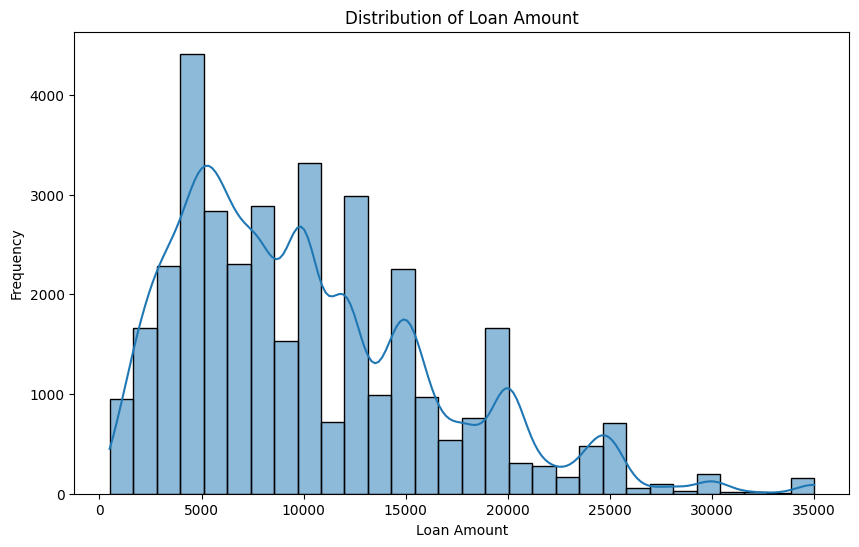

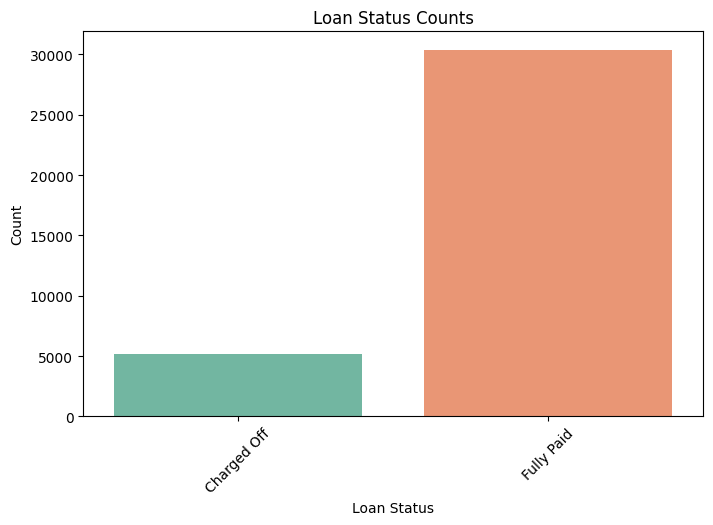

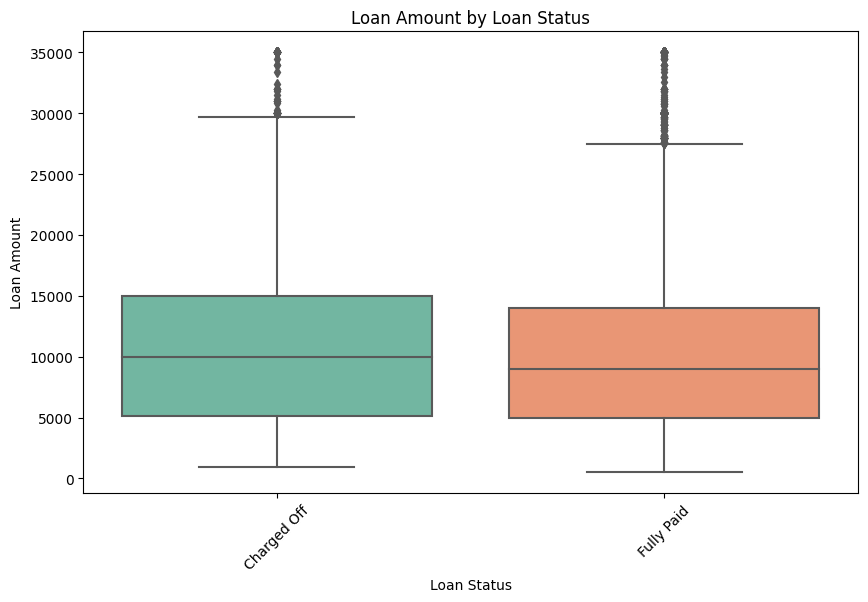

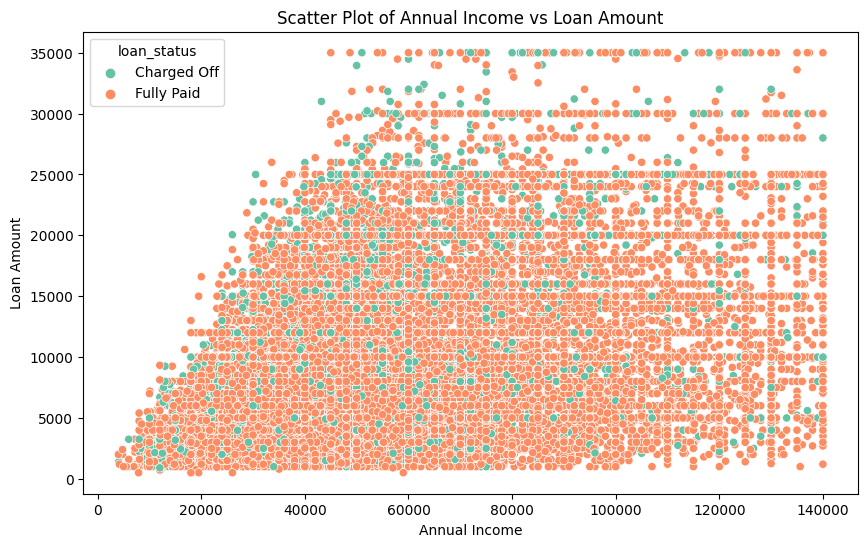

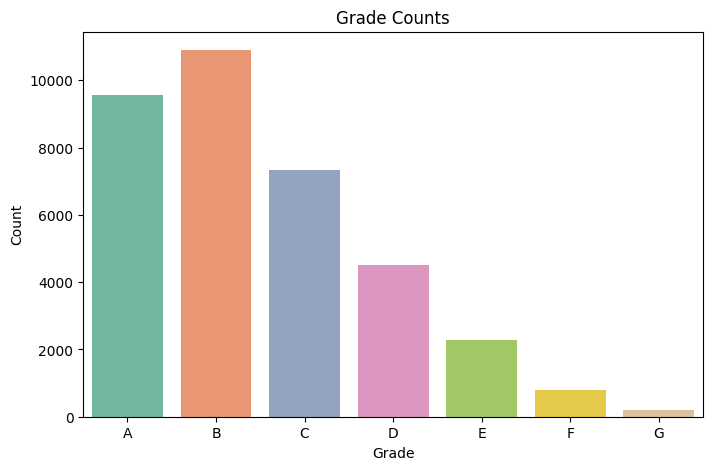

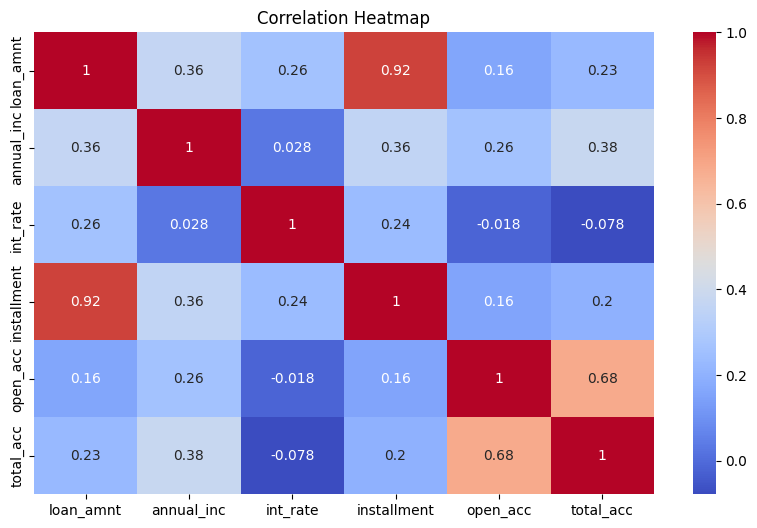

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize loan status counts
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of loan amount by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='loan_amnt', palette='Set2')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of annual income and loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_inc', y='loan_amnt', hue='loan_status', palette='Set2')
plt.title('Scatter Plot of Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# Plotting count of grades
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', palette='Set2')
plt.title('Grade Counts')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for numeric variables
corr_matrix = df[['loan_amnt', 'annual_inc', 'int_rate', 'installment', 'open_acc', 'total_acc']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualize 'revol_util' using a histogram
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)  # Convert 'revol_util' to float
plt.figure(figsize=(10, 6))
sns.histplot(df['revol_util'], bins=30, kde=True)
plt.title('Distribution of Revolving Line Utilization Rate')
plt.xlabel('Revolving Line Utilization Rate')
plt.ylabel('Frequency')
plt.show()

# Bivariate analysis: 'revol_util' vs 'loan_status'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='revol_util', palette='Set2')
plt.title('Revolving Line Utilization Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Line Utilization Rate')
plt.xticks(rotation=45)
plt.show()

# Plot for 'total_acc'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_acc'], bins=30, kde=True)
plt.title('Distribution of Total Accounts')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.show()

# Segmented univariate analysis: 'total_acc' by 'loan_status'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='total_acc', palette='Set2')
plt.title('Total Accounts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Accounts')
plt.xticks(rotation=45)
plt.show()


# ...................................................................................................................................

In [ ]:
df.columns.tolist()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status']

In [ ]:
# List of non-essential columns to drop
non_essential_columns = ['id', 'pymnt_plan','url', 'desc', 'policy_code',
                         'application_type', 'annual_inc_joint','dti_joint','verification_status_joint', 'next_pymnt_d', 'tax_liens', 'initial_list_status']

# Drop non-essential columns
loan_data = loan_data.drop(columns=non_essential_columns)

In [ ]:
# Check for missing values in each column
missing_values = loan_data.isnull().sum()

# Display the columns with missing values and the count of missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

# Check for outliers or inconsistencies as needed
# You can use descriptive statistics (e.g., describe()) to identify outliers.

# Interpret the meanings of variables by referring to the Data Dictionary
# Ensure that you understand what each variable represents.


Columns with Missing Values:
emp_title                      2459
emp_length                     1075
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 66, dtype: int64


In [ ]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


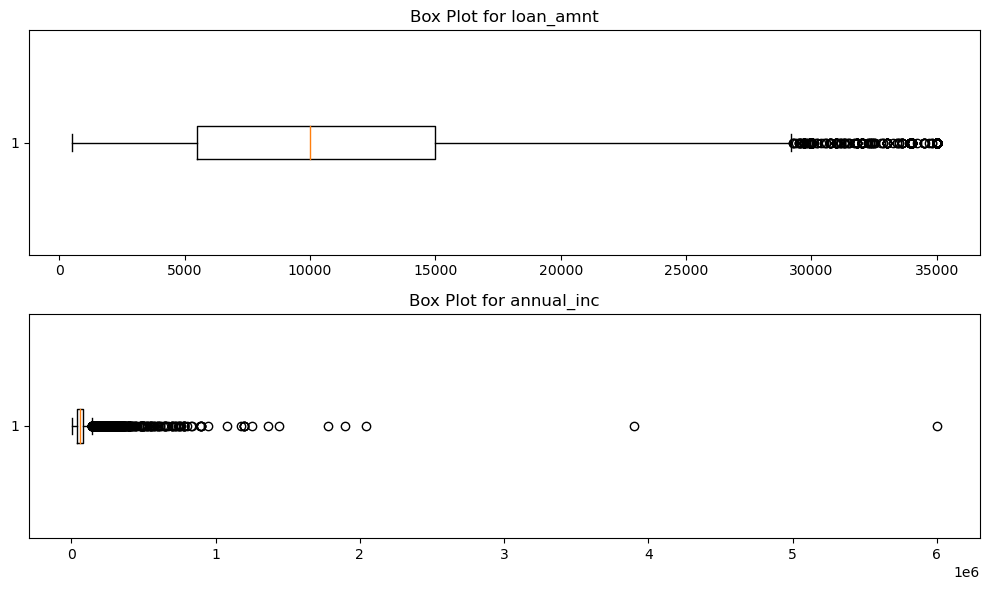

In [ ]:
import matplotlib.pyplot as plt

# Calculate summary statistics for loan_amnt and annual_inc
loan_data[['loan_amnt', 'annual_inc']].describe()

# Create box plots for loan_amnt and annual_inc
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(loan_data['loan_amnt'], vert=False)
plt.title('Box Plot for loan_amnt')

plt.subplot(2, 1, 2)
plt.boxplot(loan_data['annual_inc'], vert=False)
plt.title('Box Plot for annual_inc')

plt.tight_layout()
plt.show()


In [ ]:
# Check unique values in the home_ownership and grade columns
print("Unique values in home_ownership:")
print(loan_data['home_ownership'].unique())

print("\nUnique values in grade:")
print(loan_data['grade'].unique())


Unique values in home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']

Unique values in grade:
['B' 'C' 'A' 'E' 'F' 'D' 'G']


In [ ]:
df.shape

(39717, 53)

In [ ]:
# Identify columns with missing values
missing_values = original_df.isnull().sum()

# Loop through columns and fill missing values
for column in original_df.columns:
    if missing_values[column] > 0:
        if original_df[column].dtype == 'object':
            # For categorical columns, fill with the mode
            original_df[column].fillna(original_df[column].mode()[0], inplace=True)
        else:
            # For numeric columns, fill with the mean
            original_df[column].fillna(original_df[column].mean(), inplace=True)


In [ ]:
# Impute missing values in numerical columns with the mean
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_columns] = loan_data[numerical_columns].fillna(loan_data[numerical_columns].mean())

# Impute missing values in categorical columns with the mode
categorical_columns = loan_data.select_dtypes(include=['object']).columns
loan_data[categorical_columns] = loan_data[categorical_columns].fillna(loan_data[categorical_columns].mode().iloc[0])

# Check if there are any remaining missing values
remaining_missing = loan_data.isnull().sum().sum()
print("Remaining Missing Values:", remaining_missing)


Remaining Missing Values: 2105001


In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

# Set a threshold for missing values (e.g., 80%)
threshold = 80

# Identify columns with missing values exceeding the threshold
high_missing_columns = missing_percentage[missing_percentage > threshold].index.tolist()

# Decide whether to drop or impute these columns
# For example, you can drop them as follows:
loan_data = loan_data.drop(columns=high_missing_columns)

# Impute missing values in remaining columns with sentinel values
# For example, you can impute missing values in numerical columns with -1
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_columns] = loan_data[numerical_columns].fillna(-1)

# Impute missing values in categorical columns with 'Unknown'
categorical_columns = loan_data.select_dtypes(include=['object']).columns
loan_data[categorical_columns] = loan_data[categorical_columns].fillna('Unknown')

# Check if there are any remaining missing values
remaining_missing = loan_data.isnull().sum().sum()
print("Remaining Missing Values:", remaining_missing)


Remaining Missing Values: 0


In [ ]:
# Identify date columns
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d']

# Convert date columns to datetime
for col in date_columns:
    loan_data[col] = pd.to_datetime(loan_data[col], format='%b-%y', errors='coerce')


In [ ]:
# Convert date columns to datetime format (if applicable)
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])

# Handle string columns as needed (e.g., removing special characters, converting to lowercase, etc.)
# For example, you can clean the 'term' column to extract the numeric part.
loan_data['term'] = loan_data['term'].str.extract('(\d+)').astype(int)


In [ ]:
# Example: Create a new variable 'loan_to_income_ratio'
loan_data['loan_to_income_ratio'] = loan_data['loan_amnt'] / loan_data['annual_inc']

In [ ]:
# Save the cleaned dataset to a new CSV file
loan_data.to_csv("cleaned_loan_data.csv", index=False)

In [ ]:
loan_data = pd.read_csv('cleaned_loan_data.csv')

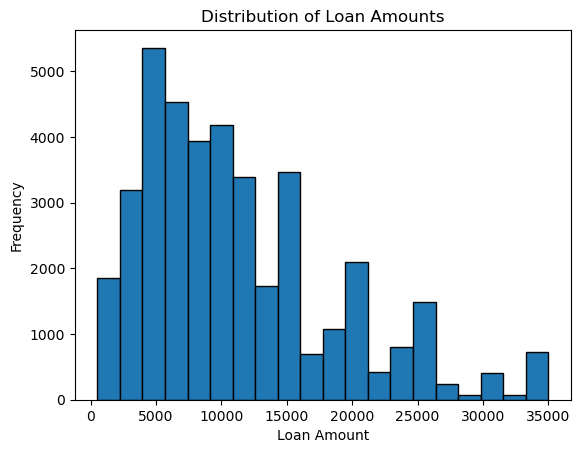

In [ ]:
# Summary statistics
summary_stats = loan_data.describe()

# Histogram of loan amounts
import matplotlib.pyplot as plt
plt.hist(loan_data['loan_amnt'], bins=20, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()


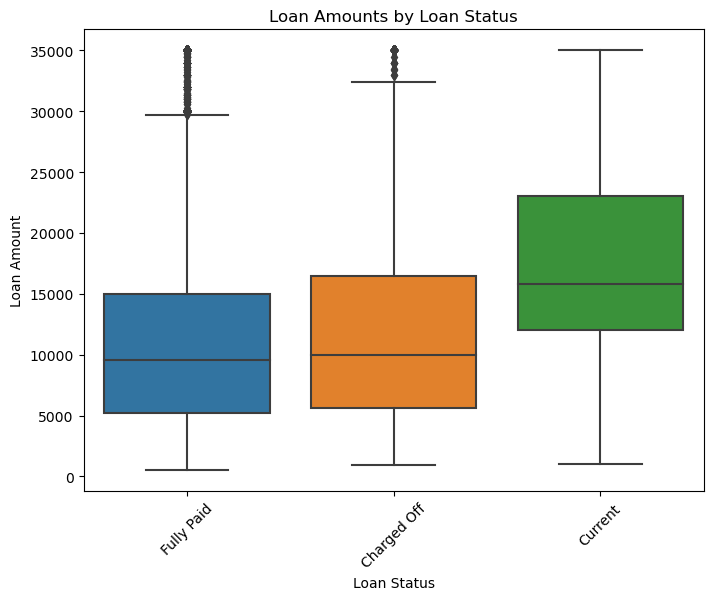

In [ ]:
# Example: Box plot of loan amounts by loan status
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amounts by Loan Status')
plt.xticks(rotation=45)
plt.show()


C:\Users\shahp\AppData\Local\Temp\ipykernel_29576\3952885027.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_data.corr()


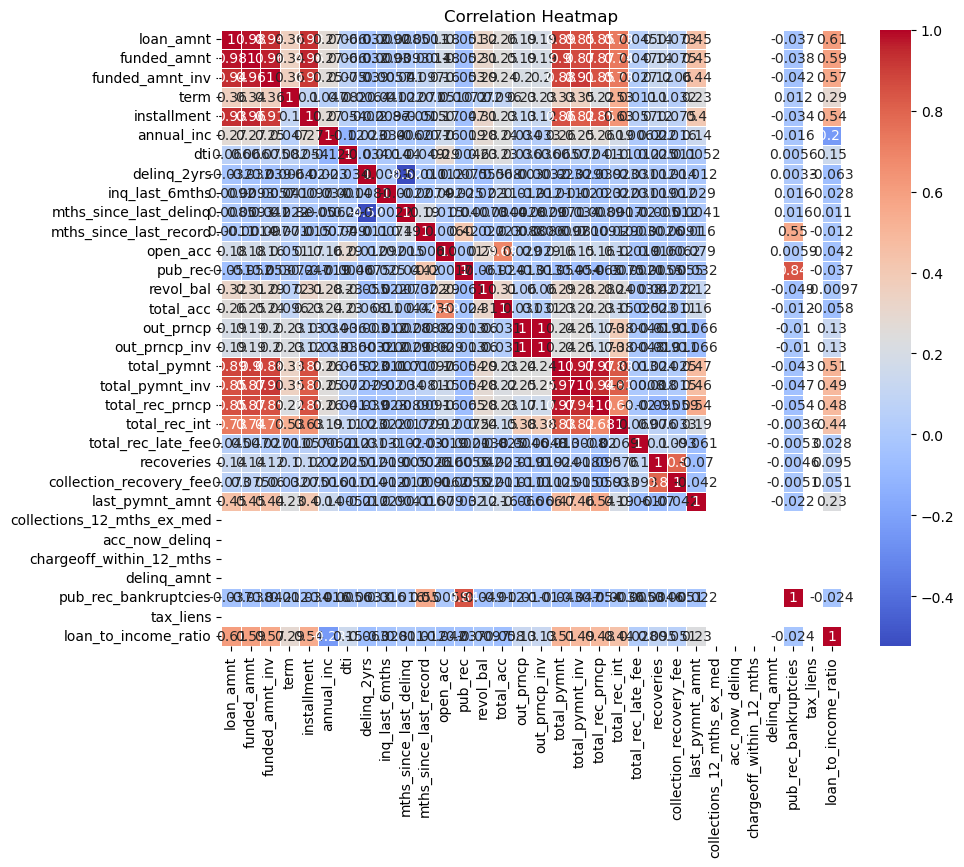

In [ ]:
# Example: Correlation heatmap of numerical variables
correlation_matrix = loan_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


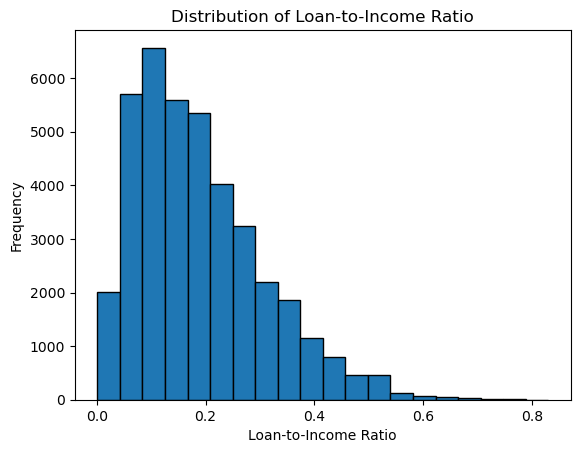

In [ ]:
# Example: Analyzing the loan-to-income ratio
plt.hist(loan_data['loan_to_income_ratio'], bins=20, edgecolor='k')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Loan-to-Income Ratio')
plt.show()


In [ ]:
loan_data.shape[1]